In [2]:
from diffusers import StableDiffusionPipeline, DiffusionPipeline
import torch
import random
from PIL import Image

import os
import argparse
import math
from datetime import datetime

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

PROMPT = "Japanese cherry blossoms and Mount Fuji, the style of a maximalist illustration"
INFERENCE_STEPS = 20
GUIDANCE_SCALE = 7.5
SEED = 42
MODEL_ID = "stabilityai/stable-diffusion-xl-base-1.0"

cuda


In [3]:
def init_pipeline(model_id: str):
    pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, variant="fp16", use_safetensors=True)
    pipe = pipe.to(device)

    return pipe


def generate_image(prompt: str, model_id: str, seed: int=None):
    pipe = init_pipeline(model_id)
    generator = torch.Generator(device).manual_seed(seed)
    
    images = pipe(
        prompt,
        num_inference_steps=INFERENCE_STEPS,
        guidance_scale=GUIDANCE_SCALE,
        num_images_per_prompt=1,
        generator=generator
    ).images

    return images

In [9]:
pipe = init_pipeline(MODEL_ID)

In [7]:
PROMPT = "A cute cat in the style of pixar"
generator = torch.Generator(device).manual_seed(SEED)

images = pipe(
    prompt=PROMPT,
    num_inference_steps=INFERENCE_STEPS,
    guidance_scale=GUIDANCE_SCALE,
    num_images_per_prompt=1,
    generator=generator
).images

  0%|          | 0/20 [00:00<?, ?it/s]

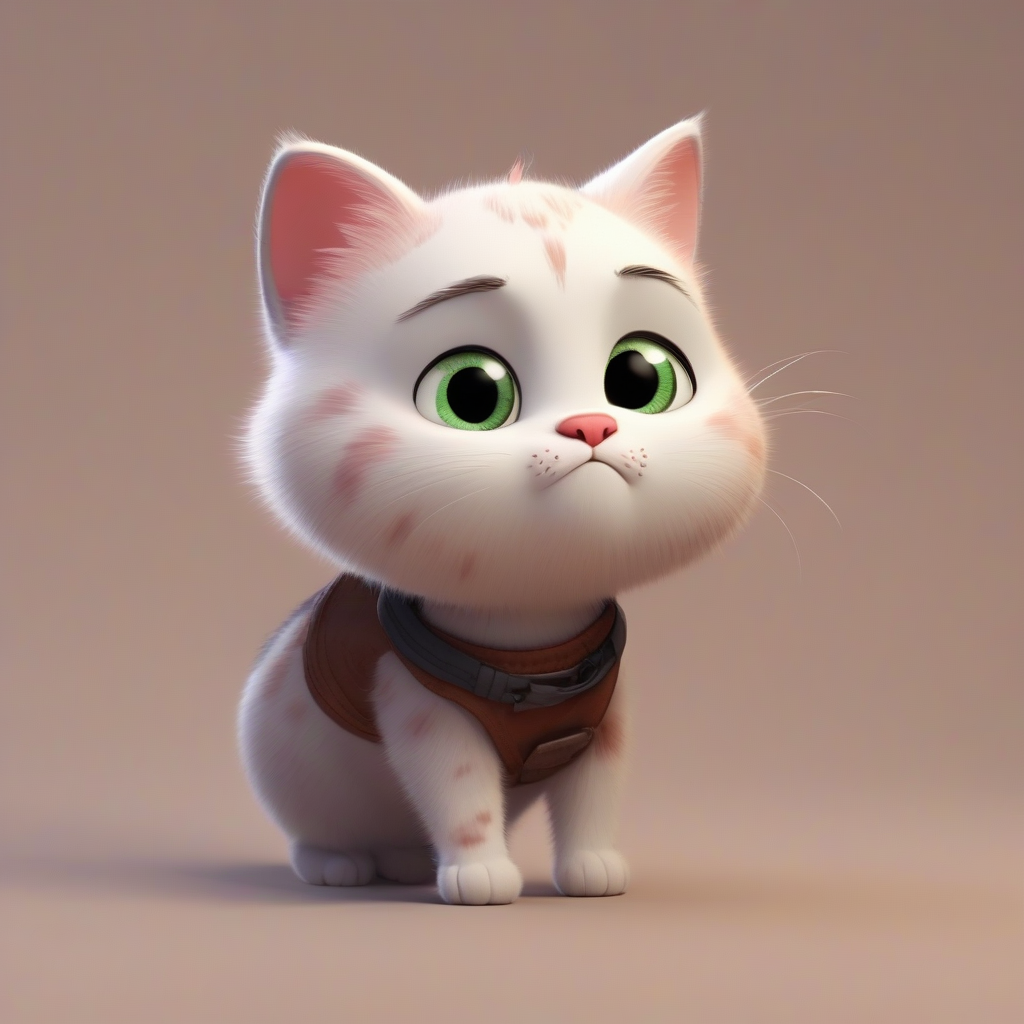

In [8]:
images[0].show()